* Creator: Chike Uduku
* Created: 04/05/2019
* Revision: 1.0

* SUMMARY:
    * As was expected, we observe that temperature increases as we get closer to the equator (latitude of 0) and decreases as we get further away.
    * Wind speed also appears to decrease as we get closer to the equator and increase as we move away from the equator
    * Cloudiness does not appear to be affected by proximity to the equator

In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import random
import requests
from citipy import citipy
from config import api_Key

In [2]:
#Generate a list of coordinates
cdnates = [(random.uniform(-90,90),random.uniform(-180,180))for g in range(1500) ]

In [3]:
#Now that we have a list of coordinates, let's use citipy module to find cities that are close to those coordinates
cities= [] #list to house city names
countryCodes = []#list to house countries for the respective city names

#Build city list
for (lat,lng) in cdnates:
        if citipy.nearest_city(lat,lng).city_name not in cities:
            cities.append(citipy.nearest_city(lat,lng).city_name)
            countryCodes.append(citipy.nearest_city(lat,lng).country_code)

In [4]:
#show number of cities to verify that there are at least 500 of them
len(cities)

626

In [5]:
#Setup Dataframe and display structure
city_df = pd.DataFrame({"City":cities})
city_df["Cloudines"] = ""
city_df["Country"] = pd.Series(countryCodes)
city_df["Date"] = ""
city_df["Humidity"] = ""
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Wind Speed"] = ""
city_df.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,penzance,,gb,,,,,,
1,hermanus,,za,,,,,,
2,busselton,,au,,,,,,
3,griffith,,au,,,,,,
4,port alfred,,za,,,,,,


In [6]:
#Define Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#Now that we have our base url, let's iterate through the data frame to populate the other fields for the respective cities
for i in range(len(city_df.index)):
    #build request url
    rqst_url = base_url + city_df.iloc[i,0] + "," + city_df.iloc[i,2] + "&appid=" + api_Key 
    #Print to terminal
    print(f'Retrieving result for index {i}: city of {city_df.iloc[i,0]}\n\r-------------------\n\r')
    #Get query responce via API
    rspns = requests.get(rqst_url).json()
    
    #Handle scenario where no result was returned for the city being queried by filling all columns for the respective row
    #with a "NaN"
    if(rspns["cod"] == '404'):
        city_df.iloc[i,1] = "NaN" #Cloudiness
        city_df.iloc[i,2] = "NaN" #Country
        city_df.iloc[i,3] = "NaN" #Date
        city_df.iloc[i,4] = "NaN" #Humidity
        city_df.iloc[i,5] = "NaN" #Latitude
        city_df.iloc[i,6] = "NaN" #Longitude
        city_df.iloc[i,7] = "NaN" #Max temp
        city_df.iloc[i,8] = "NaN" #Wind Speed
    #if results were returned for the city being queried, populate the respective columns for that city row
    else:
        city_df.iloc[i,1] = rspns["clouds"]["all"] #Cloudiness
        city_df.iloc[i,2] = rspns["sys"]["country"] #Country
        city_df.iloc[i,3] = rspns["dt"] #Date
        city_df.iloc[i,4] = rspns["main"]["humidity"] #Humidity
        city_df.iloc[i,5] = rspns["coord"]["lat"] #Latitude
        city_df.iloc[i,6] = rspns["coord"]["lon"] #Longitude
        city_df.iloc[i,7] = rspns["main"]["temp_max"] #Max temp
        city_df.iloc[i,8] = rspns["wind"]["speed"] #Wind Speed

Retrieving result for index 0: city of penzance
-------------------

Retrieving result for index 1: city of hermanus
-------------------

Retrieving result for index 2: city of busselton
-------------------

Retrieving result for index 3: city of griffith
-------------------

Retrieving result for index 4: city of port alfred
-------------------

Retrieving result for index 5: city of grindavik
-------------------

Retrieving result for index 6: city of kloulklubed
-------------------

Retrieving result for index 7: city of taolanaro
-------------------

Retrieving result for index 8: city of uglovskoye
-------------------

Retrieving result for index 9: city of tasiilaq
-------------------

Retrieving result for index 10: city of port elizabeth
-------------------

Retrieving result for index 11: city of lavrentiya
-------------------

Retrieving result for index 12: city of thompson
-------------------

Retrieving result for index 13: city of ushuaia
-------------------

Retrieving r

Retrieving result for index 116: city of bluff
-------------------

Retrieving result for index 117: city of altay
-------------------

Retrieving result for index 118: city of swellendam
-------------------

Retrieving result for index 119: city of codrington
-------------------

Retrieving result for index 120: city of inirida
-------------------

Retrieving result for index 121: city of launceston
-------------------

Retrieving result for index 122: city of mount isa
-------------------

Retrieving result for index 123: city of labelle
-------------------

Retrieving result for index 124: city of saskylakh
-------------------

Retrieving result for index 125: city of khash
-------------------

Retrieving result for index 126: city of esperance
-------------------

Retrieving result for index 127: city of laguna
-------------------

Retrieving result for index 128: city of kilcullen
-------------------

Retrieving result for index 129: city of garissa
-------------------

Retrieving

Retrieving result for index 232: city of dikson
-------------------

Retrieving result for index 233: city of portomaggiore
-------------------

Retrieving result for index 234: city of chokurdakh
-------------------

Retrieving result for index 235: city of wulanhaote
-------------------

Retrieving result for index 236: city of arlit
-------------------

Retrieving result for index 237: city of vicuna
-------------------

Retrieving result for index 238: city of eenhana
-------------------

Retrieving result for index 239: city of shenzhen
-------------------

Retrieving result for index 240: city of bacolod
-------------------

Retrieving result for index 241: city of nova olimpia
-------------------

Retrieving result for index 242: city of gornopravdinsk
-------------------

Retrieving result for index 243: city of bella union
-------------------

Retrieving result for index 244: city of misratah
-------------------

Retrieving result for index 245: city of mendahara
-------------

Retrieving result for index 348: city of iqaluit
-------------------

Retrieving result for index 349: city of itarema
-------------------

Retrieving result for index 350: city of quatre cocos
-------------------

Retrieving result for index 351: city of saquarema
-------------------

Retrieving result for index 352: city of nizhnyaya poyma
-------------------

Retrieving result for index 353: city of ubinskoye
-------------------

Retrieving result for index 354: city of torbay
-------------------

Retrieving result for index 355: city of port macquarie
-------------------

Retrieving result for index 356: city of nha trang
-------------------

Retrieving result for index 357: city of rocha
-------------------

Retrieving result for index 358: city of high level
-------------------

Retrieving result for index 359: city of pahrump
-------------------

Retrieving result for index 360: city of dunedin
-------------------

Retrieving result for index 361: city of bosaso
----------------

Retrieving result for index 464: city of nemuro
-------------------

Retrieving result for index 465: city of vastervik
-------------------

Retrieving result for index 466: city of el dorado
-------------------

Retrieving result for index 467: city of tczew
-------------------

Retrieving result for index 468: city of kyren
-------------------

Retrieving result for index 469: city of pangkalanbuun
-------------------

Retrieving result for index 470: city of beringovskiy
-------------------

Retrieving result for index 471: city of aripuana
-------------------

Retrieving result for index 472: city of sibolga
-------------------

Retrieving result for index 473: city of sena madureira
-------------------

Retrieving result for index 474: city of saldanha
-------------------

Retrieving result for index 475: city of coihaique
-------------------

Retrieving result for index 476: city of mattru
-------------------

Retrieving result for index 477: city of ishigaki
-------------------


Retrieving result for index 581: city of grand river south east
-------------------

Retrieving result for index 582: city of velvary
-------------------

Retrieving result for index 583: city of pacifica
-------------------

Retrieving result for index 584: city of bonfim
-------------------

Retrieving result for index 585: city of burgersdorp
-------------------

Retrieving result for index 586: city of carutapera
-------------------

Retrieving result for index 587: city of zaraza
-------------------

Retrieving result for index 588: city of pangai
-------------------

Retrieving result for index 589: city of coxim
-------------------

Retrieving result for index 590: city of shelburne
-------------------

Retrieving result for index 591: city of isla vista
-------------------

Retrieving result for index 592: city of mugumu
-------------------

Retrieving result for index 593: city of berdigestyakh
-------------------

Retrieving result for index 594: city of kharan
--------------

In [7]:
#Drop cities which returned no results and preview new data frame
updatedCity_df = city_df[~city_df.isin(['NaN', 'NaT']).any(axis=1)]
updatedCity_df.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,penzance,20,GB,1554568510,76,50.12,-5.53,286.48,8.2
1,hermanus,0,ZA,1554568306,71,-34.42,19.24,293.15,1.79
2,busselton,76,AU,1554568810,53,-33.64,115.35,285.93,4.66
3,griffith,0,AU,1554568825,79,-34.29,146.06,283.548,1.21
4,port alfred,8,ZA,1554568580,86,-33.59,26.89,291.48,0.45


In [8]:
#Show number of cities in updated data frame
updatedCity_df["City"].count()

545

* Plots

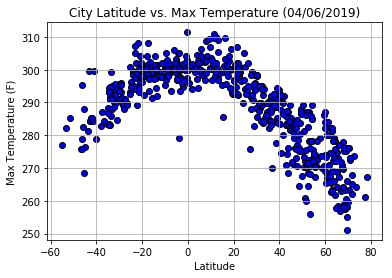

In [9]:
#Latitude vs Max Temp plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Max Temp"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Max Temperature (04/06/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Outputs/Lat_vs_MaxTemp.png")
plt.show()

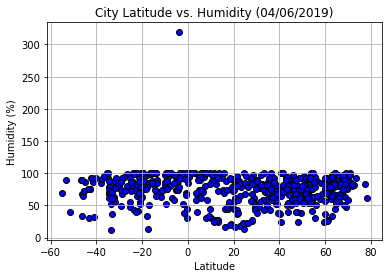

In [10]:
#Latitude vs Humidity plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Humidity"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Humidity (04/06/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Outputs/Lat_vs_Humidity.png")
plt.show()

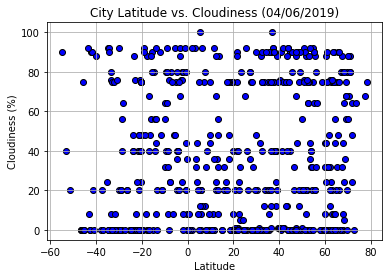

In [11]:
#Latitude vs Cloudiness plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Cloudines"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Cloudiness (04/06/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Outputs/Lat_vs_Cloudiness.png")
plt.show()

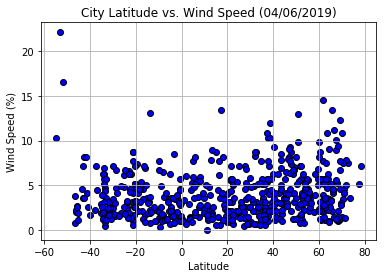

In [12]:
#Latitude vs Wind Speed plot
plt.scatter(updatedCity_df["Lat"],updatedCity_df["Wind Speed"],marker = 'o',facecolors = "blue",edgecolors = "black" )
plt.title("City Latitude vs. Wind Speed (04/06/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()
plt.savefig("Outputs/Lat_vs_Wind Speed.png")
plt.show()

In [ ]:
#Save DataFrame to CSV file
updatedCity_df.t